# Linear Regression Assignment
## Carprice Case Study

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 

Essentially, the company wants —


- Which variables are significant in predicting the price of a car

- How well those variables describe the price of a car

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

## 1.a. Reading the data

In [694]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [695]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 500)

CarPrice_Assignment file has the data. It is read using pd.read_csv

In [696]:
CarPrice = pd.read_csv("CarPrice_Assignment.csv")

## 1.b. Understanding the data

### We will have a look at the top 5 and bottom 5 records in the CarPrice dataframe.

In [521]:
CarPrice.head()

carheight  curbweight  enginesize  boreratio  stroke  compressionratio  \
0       48.8        2548         130       3.47    2.68               9.0   
1       48.8        2548         130       3.47    2.68               9.0   
2       52.4        2823         152       2.68    3.47               9.0   
3       54.3        2337         109       3.19    3.40              10.0   
4       54.3        2824         136       3.19    3.40               8.0   

   peakrpm  price  fueleconomy  Medium  Highend  fueltypeisgas  2doors  \
0     5000  13495        23.70       1        0              1       1   
1     5000  16500        23.70       1        0              1       1   
2     5000  16500        22.15       1        0              1       1   
3     5500  13950        26.70       1        0              1       0   
4     5500  17450        19.80       1        0              1       0   

   aspirationisstd  drivewheelisfwd  enginelocationisfront  five  four  six  \
0                1                0                      1     0     1    0   
1                1                0                      1     0     1    0   
2                1                0                      1     0     0    1   
3                1                1                      1     0     1    0   
4                1                1                      1     1     0    0   

   three  twelve  two  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  dohcv  l  ohc  \
0      0       0    0     0     0    0    0     1     0     0      0  0    0   
1      0       0    0     0     0    0    0     1     0     0      0  0    0   
2      0       0    0     0     0    0    0     1     0     0      0  0    0   
3      0       0    0     0     0    0    0     1     0     0      0  0    1   
4      0       0    0     0     0    0    0     1     0     0      0  0    1   

   ohcf  ohcv  rotor  carbodyisconvertible  carbodyishatchback  \
0     0     0      0                     1                   0   
1     0     0      0                     1                   0   
2     0     1      0                     0                   1   
3     0     0      0                     0                   0   
4     0     0      0                     0                   0   

   carbodyissedan  carbodyiswagon  symbolingisRisky  symbolingisNotRisky  
0               0               0                 1                    0  
1               0               0                 1                    0  
2               0               0                 1                    0  
3               1               0                 1                    0  
4               1               0                 1                    0

In [522]:
CarPrice.tail()

carheight  curbweight  enginesize  boreratio  stroke  compressionratio  \
200       55.5        2952         141       3.78    3.15               9.5   
201       55.5        3049         141       3.78    3.15               8.7   
202       55.5        3012         173       3.58    2.87               8.8   
203       55.5        3217         145       3.01    3.40              23.0   
204       55.5        3062         141       3.78    3.15               9.5   

     peakrpm  price  fueleconomy  Medium  Highend  fueltypeisgas  2doors  \
200     5400  16845        25.25       1        0              1       0   
201     5300  19045        21.70       1        0              1       0   
202     5500  21485        20.25       1        0              1       0   
203     4800  22470        26.45       1        0              0       0   
204     5400  22625        21.70       1        0              1       0   

     aspirationisstd  drivewheelisfwd  enginelocationisfront  five  four  six  \
200                1                0                      1     0     1    0   
201                0                0                      1     0     1    0   
202                1                0                      1     0     0    1   
203                0                0                      1     0     0    1   
204                0                0                      1     0     1    0   

     three  twelve  two  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  dohcv  l  \
200      0       0    0     0     0    0    0     1     0     0      0  0   
201      0       0    0     0     0    0    0     1     0     0      0  0   
202      0       0    0     0     0    0    0     1     0     0      0  0   
203      0       0    0     0     0    1    0     0     0     0      0  0   
204      0       0    0     0     0    0    0     1     0     0      0  0   

     ohc  ohcf  ohcv  rotor  carbodyisconvertible  carbodyishatchback  \
200    1     0     0      0                     0                   0   
201    1     0     0      0                     0                   0   
202    0     0     1      0                     0                   0   
203    1     0     0      0                     0                   0   
204    1     0     0      0                     0                   0   

     carbodyissedan  carbodyiswagon  symbolingisRisky  symbolingisNotRisky  
200               1               0                 0                    1  
201               1               0                 0                    1  
202               1               0                 0                    1  
203               1               0                 0                    1  
204               1               0                 0                    1

In [523]:
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 41 columns):
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
peakrpm                  205 non-null int64
price                    205 non-null int32
fueleconomy              205 non-null float64
Medium                   205 non-null uint8
Highend                  205 non-null uint8
fueltypeisgas            205 non-null int32
2doors                   205 non-null int32
aspirationisstd          205 non-null int32
drivewheelisfwd          205 non-null int32
enginelocationisfront    205 non-null int32
five                     205 non-null uint8
four                     205 non-null uint8
six                      205 non-null uint8
three                    205 non-null uint8
twelv

Now let us check the shape of the dataframe. 


In [524]:
CarPrice.shape

(205, 41)

It looks like we have 205 rows and 41 columns.

Now let us look at the statistical structure of the dataset.

In [528]:
CarPrice.describe()

carheight   curbweight  enginesize   boreratio      stroke  \
count  205.000000   205.000000  205.000000  205.000000  205.000000   
mean    53.724878  2555.565854  126.907317    3.329756    3.255415   
std      2.443522   520.680204   41.642693    0.270844    0.313597   
min     47.800000  1488.000000   61.000000    2.540000    2.070000   
25%     52.000000  2145.000000   97.000000    3.150000    3.110000   
50%     54.100000  2414.000000  120.000000    3.310000    3.290000   
75%     55.500000  2935.000000  141.000000    3.580000    3.410000   
max     59.800000  4066.000000  326.000000    3.940000    4.170000   

       compressionratio      peakrpm         price  fueleconomy      Medium  \
count        205.000000   205.000000    205.000000   205.000000  205.000000   
mean          10.142537  5125.121951  13276.702439    27.708780    0.419512   
std            3.972040   476.985643   7988.848977     6.649183    0.494687   
min            7.000000  4150.000000   5118.000000    14.800000    0.000000   
25%            8.600000  4800.000000   7788.000000    21.950000    0.000000   
50%            9.000000  5200.000000  10295.000000    26.700000    0.000000   
75%            9.400000  5500.000000  16503.000000    31.800000    1.000000   
max           23.000000  6600.000000  45400.000000    51.250000    1.000000   

          Highend  fueltypeisgas      2doors  aspirationisstd  \
count  205.000000     205.000000  205.000000       205.000000   
mean     0.117073       0.902439    0.439024         0.819512   
std      0.322294       0.297446    0.497483         0.385535   
min      0.000000       0.000000    0.000000         0.000000   
25%      0.000000       1.000000    0.000000         1.000000   
50%      0.000000       1.000000    0.000000         1.000000   
75%      0.000000       1.000000    1.000000         1.000000   
max      1.000000       1.000000    1.000000         1.000000   

       drivewheelisfwd  enginelocationisfront        five        four  \
count       205.000000             205.000000  205.000000  205.000000   
mean          0.629268               0.985366    0.053659    0.775610   
std           0.484183               0.120377    0.225894    0.418201   
min           0.000000               0.000000    0.000000    0.000000   
25%           0.000000               1.000000    0.000000    1.000000   
50%           1.000000               1.000000    0.000000    1.000000   
75%           1.000000               1.000000    0.000000    1.000000   
max           1.000000               1.000000    1.000000    1.000000   

              six       three      twelve         two        2bbl        4bbl  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.117073    0.004878    0.004878    0.019512    0.321951    0.014634   
std      0.322294    0.069843    0.069843    0.138655    0.468368    0.120377   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              idi         mfi        mpfi        spdi        spfi       dohcv  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.097561    0.004878    0.458537    0.043902    0.004878    0.004878   
std      0.297446    0.069843    0.499498    0.205380    0.069843    0.069843   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000  

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [697]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

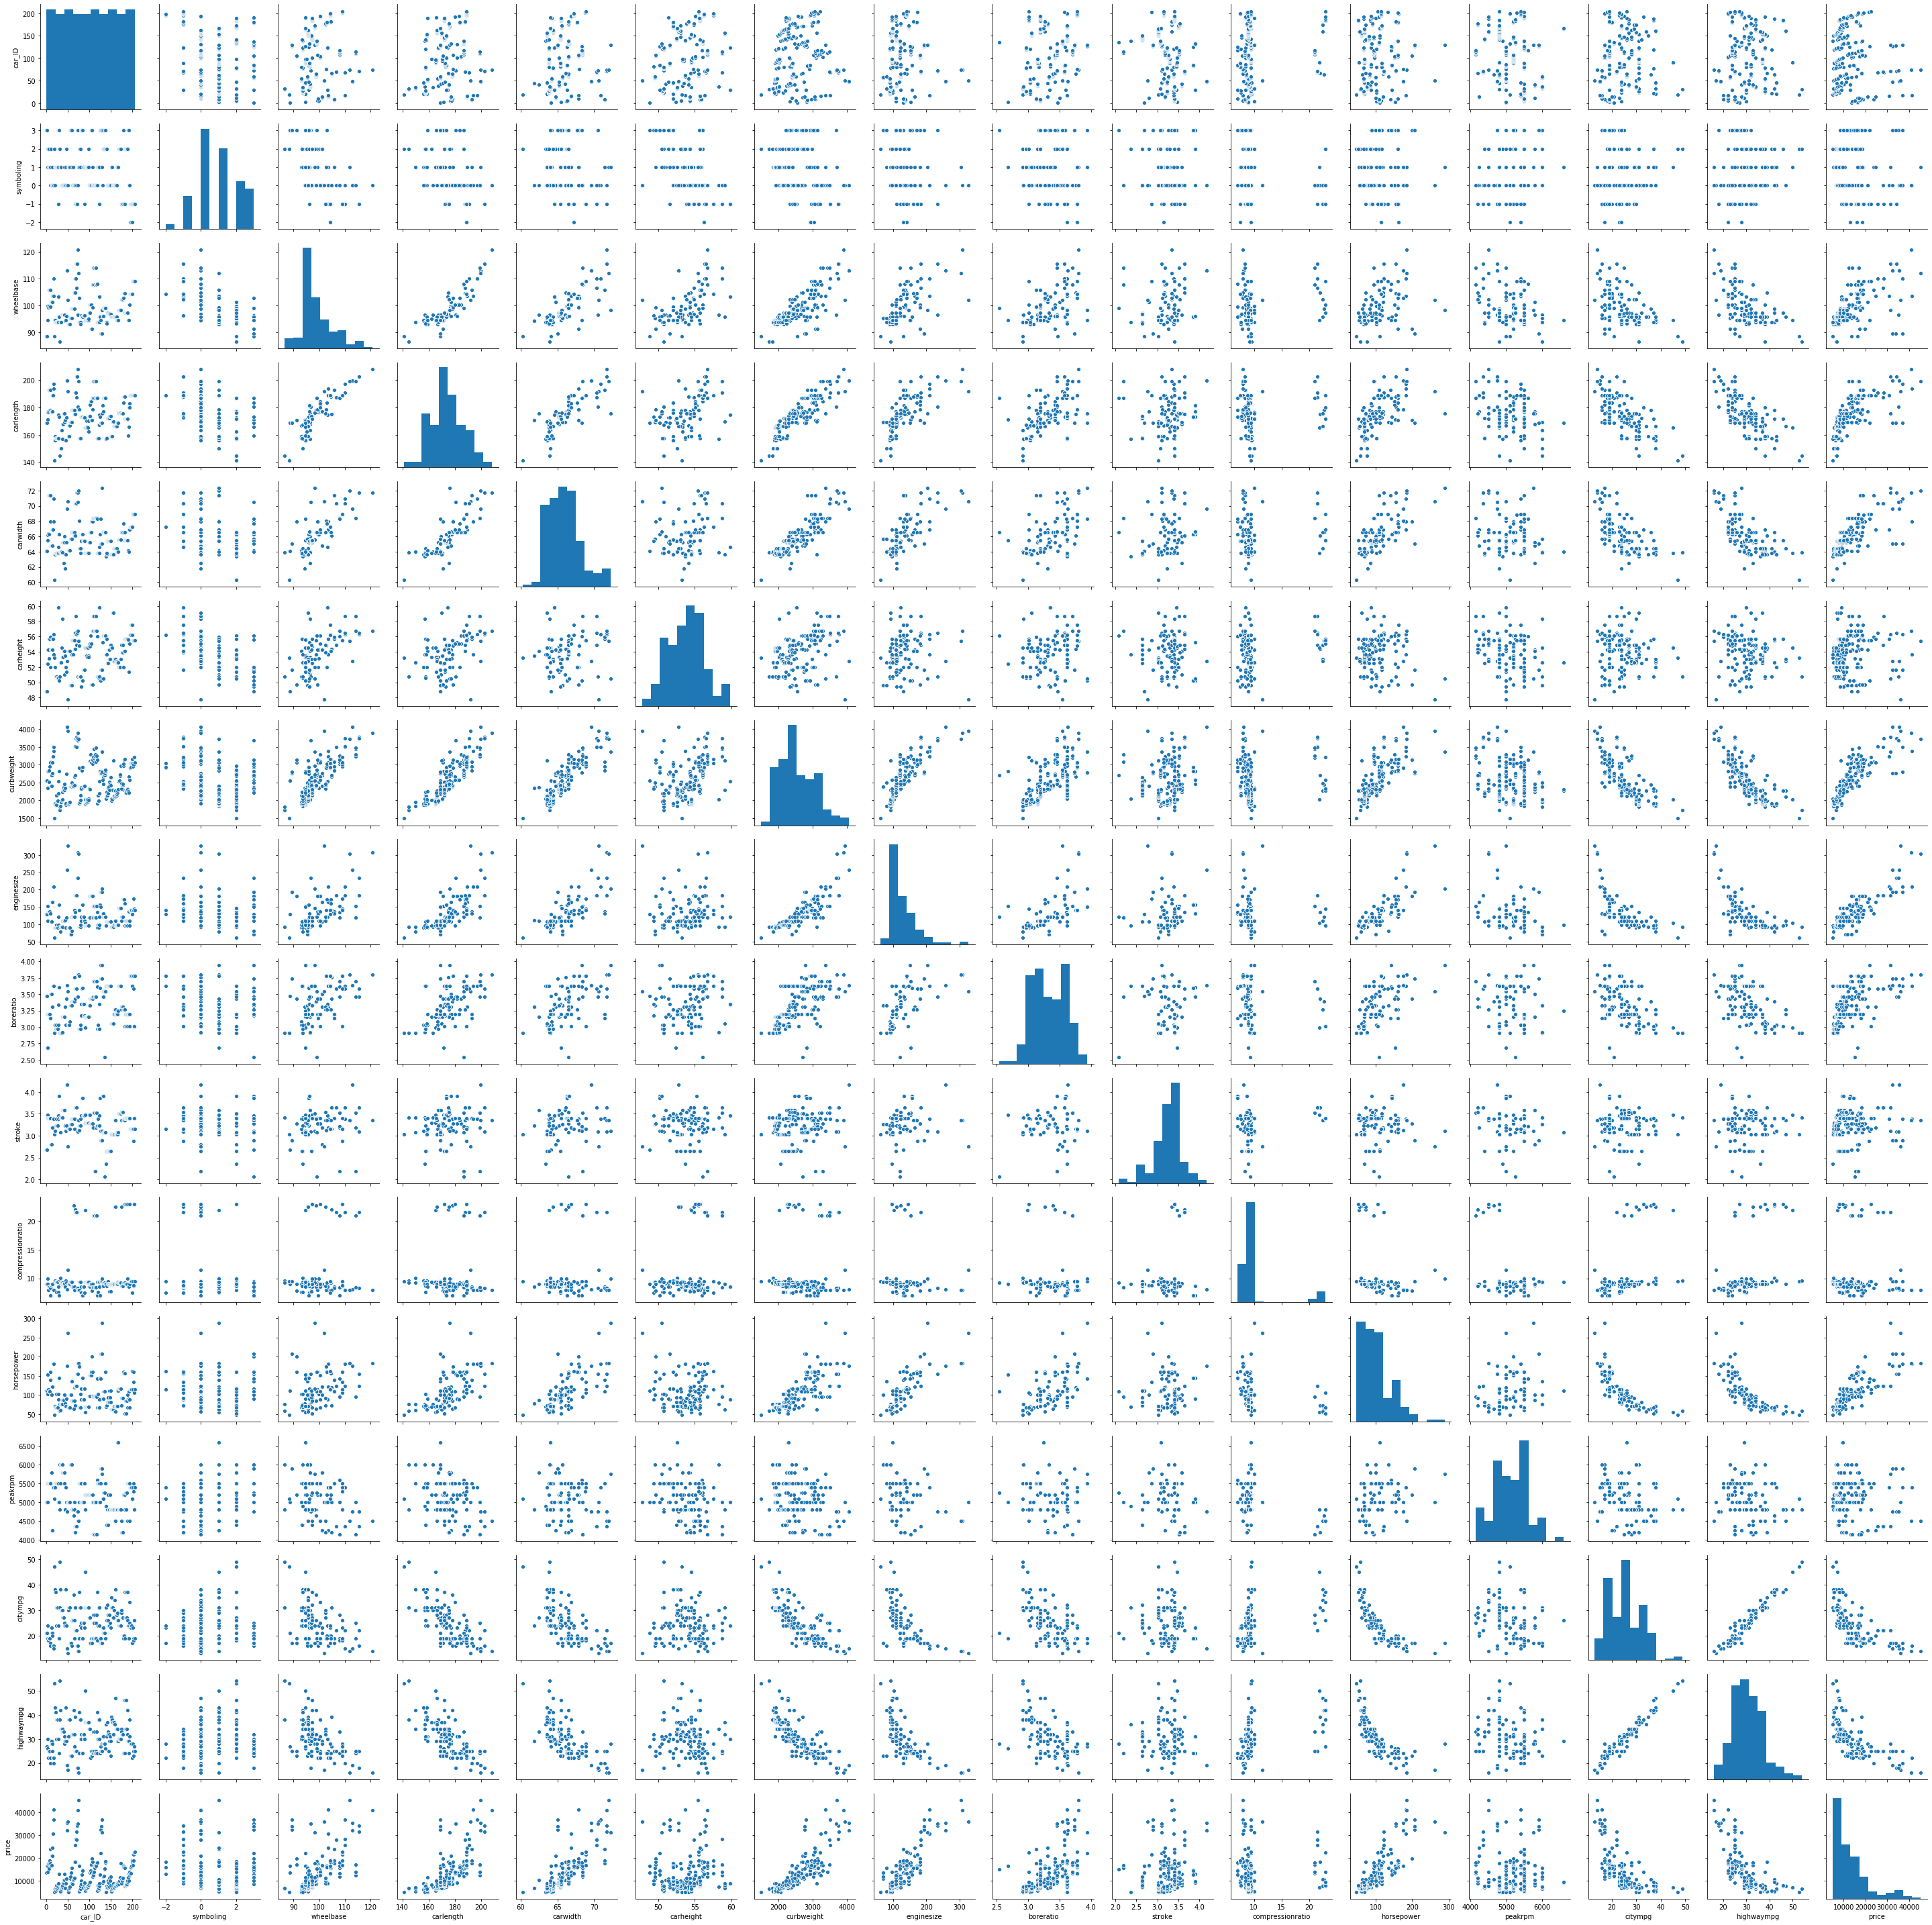

In [698]:
sns.pairplot(CarPrice)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

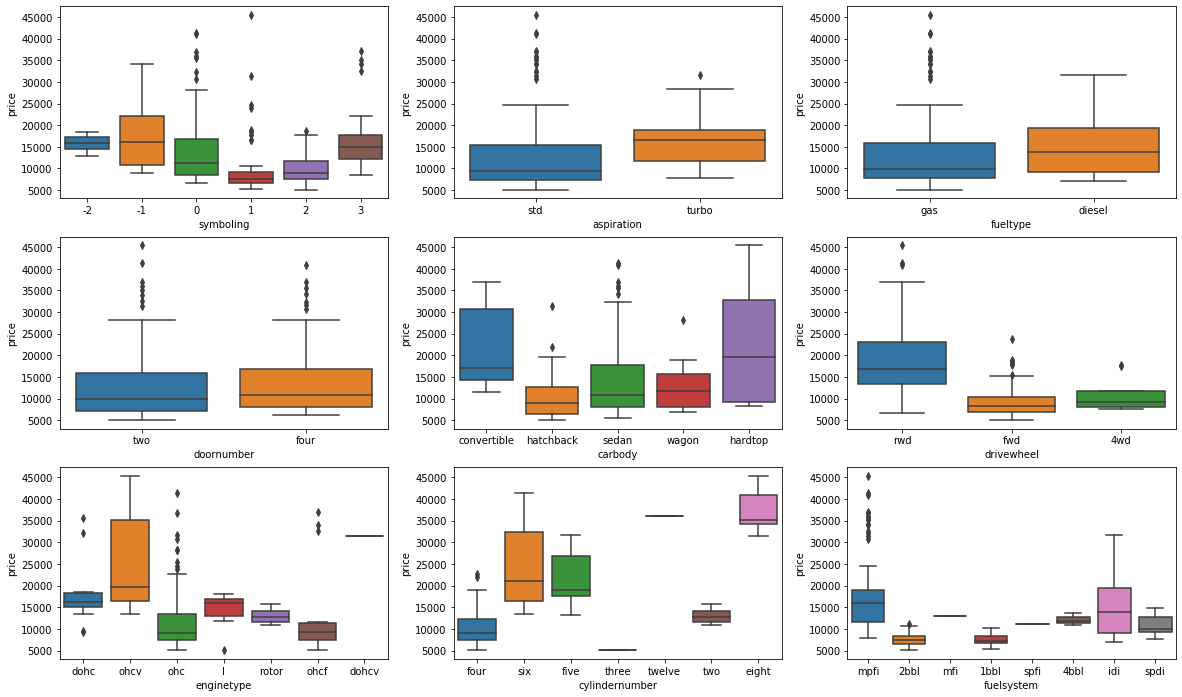

In [699]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = CarPrice)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = CarPrice)
plt.subplot(3,3,3)
sns.boxplot(x = 'fueltype', y = 'price', data = CarPrice)
plt.subplot(3,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = CarPrice)
plt.subplot(3,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = CarPrice)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarPrice)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = CarPrice)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = CarPrice)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = CarPrice)
plt.show()






## Checking the outliers

In the above set of box plots we can see there are quite a few outliers. For example, the door number has outliers in both 2 or 4 doors. Similarly we can find outliers in the below independent variables:
    - carbody
    - drivewheel
    - engine type
    - fuel system
    - symbling 
    - aspiration
    - fuel type
    
 But since the data is less, we decide not to treat the outliers and use the data as such.

### Visualising the Car Price Ditribution and Spread

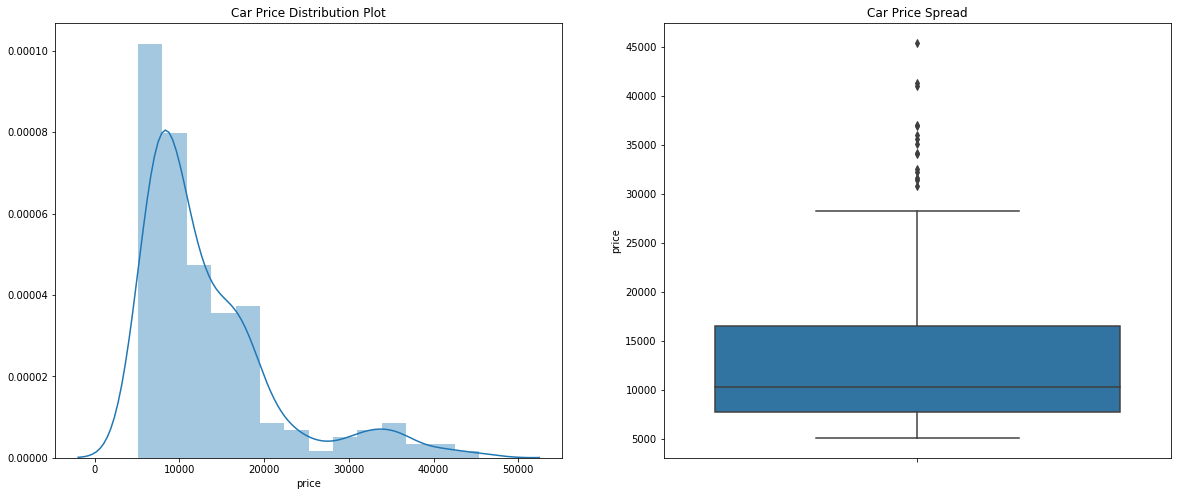

In [701]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(CarPrice.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=CarPrice.price)

plt.show()

In [702]:
print(CarPrice.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


### Inference :
The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000). The cars with low price range seems to be more as shown in the dataset.<br/>
There is a significant difference between the mean and the median of the price distribution.<br/>
The data points are far spread out from the mean, which indicates a high variance in the car prices.<br/>(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)<br/>

# Step 3: Data Preparation

#### CarName field is a combination of Car Company name + Car model name. So we split that into 2 different variables to analyse further.

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. We need to consider only company name as the independent variable for model building.

In [703]:
tempdf=CarPrice.CarName.str.split(expand=True)
CarPrice['CarCompany']=tempdf[0]
CarPrice['CarModel']=tempdf[1]
print(CarPrice.CarCompany.unique())
print(CarPrice.columns)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarCompany', 'CarModel'],
      dtype='object')


In [704]:
# Removing the car name since it becomes redundant after Car Company and Car Model is created.
CarPrice=CarPrice.drop(['CarName'], axis = 1)

CarPrice.head()

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0       1          3      gas        std        two  convertible        rwd   
1       2          3      gas        std        two  convertible        rwd   
2       3          1      gas        std        two    hatchback        rwd   
3       4          2      gas        std       four        sedan        fwd   
4       5          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0          front       88.6      168.8      64.1       48.8        2548   
1          front       88.6      168.8      64.1       48.8        2548   
2          front       94.5      171.2      65.5       52.4        2823   
3          front       99.8      176.6      66.2       54.3        2337   
4          front       99.4      176.6      66.4       54.3        2824   

  enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0       dohc           four         130       mpfi       3.47    2.68   
1       dohc           four         130       mpfi       3.47    2.68   
2       ohcv            six         152       mpfi       2.68    3.47   
3        ohc           four         109       mpfi       3.19    3.40   
4        ohc           five         136       mpfi       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0               9.0         111     5000       21          27  13495.0   
1               9.0         111     5000       21          27  16500.0   
2               9.0         154     5000       19          26  16500.0   
3              10.0         102     5500       24          30  13950.0   
4               8.0         115     5500       18          22  17450.0   

    CarCompany      CarModel  
0  alfa-romero        giulia  
1  alfa-romero       stelvio  
2  alfa-romero  Quadrifoglio  
3         audi           100  
4         audi         100ls

## Dropping the unnecessary columns

The following columns are dropped for the below reasons: <br/>
1. Car_ID is a unique id for each record. So we cannot draw any inference from this. So we drop the id field.
2. CarModel is specific to the particular car company and would not serve the purpose of our analysis so dropping this also.

In [705]:
# Removing unnecessary columns
CarPrice=CarPrice.drop(['car_ID'], axis = 1)


CarPrice=CarPrice.drop(['CarModel'], axis = 1)


CarPrice.head()

symboling fueltype aspiration doornumber      carbody drivewheel  \
0          3      gas        std        two  convertible        rwd   
1          3      gas        std        two  convertible        rwd   
2          1      gas        std        two    hatchback        rwd   
3          2      gas        std       four        sedan        fwd   
4          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0          front       88.6      168.8      64.1       48.8        2548   
1          front       88.6      168.8      64.1       48.8        2548   
2          front       94.5      171.2      65.5       52.4        2823   
3          front       99.8      176.6      66.2       54.3        2337   
4          front       99.4      176.6      66.4       54.3        2824   

  enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0       dohc           four         130       mpfi       3.47    2.68   
1       dohc           four         130       mpfi       3.47    2.68   
2       ohcv            six         152       mpfi       2.68    3.47   
3        ohc           four         109       mpfi       3.19    3.40   
4        ohc           five         136       mpfi       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0               9.0         111     5000       21          27  13495.0   
1               9.0         111     5000       21          27  16500.0   
2               9.0         154     5000       19          26  16500.0   
3              10.0         102     5500       24          30  13950.0   
4               8.0         115     5500       18          22  17450.0   

    CarCompany  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3         audi  
4         audi

## Data Cleaning
1. Corrections are made for the misspelt values in the column CarCompany

In [706]:
CarPrice.CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [707]:
#Correcting the spelling errors 
CarPrice = CarPrice.replace({'CarCompany' : { 'vokswagen' : 'volkswagen','vw' : 'volkswagen', 'maxda' : 'mazda', 'Nissan' :'nissan','toyouta': 'toyota','porcshce':'porsche' }})
print(CarPrice.CarCompany.unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


Now let us plot the carcompany Vs price to see the trend in the price range.

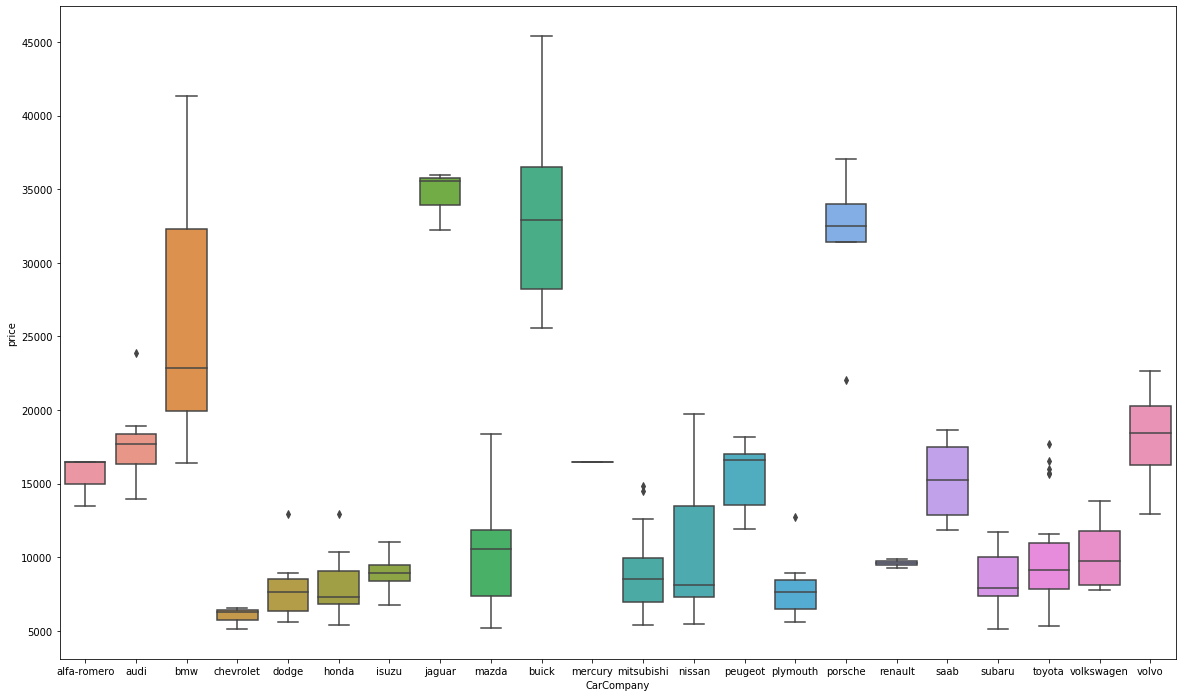

In [708]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'CarCompany', y = 'price', data = CarPrice)
plt.show()



# Derived Metrics

Now we look for the opportunities for deriving meaningful metrics out of the raw columns in the dataset.
<br/> 
1. Car companies can be grouped based on the price range.
2. The city mileage and higway mileage can be clubbed together as fuel economy.

### 1. Car price range

In [709]:
#Binning the Car Companies based on avg prices of each Company.
CarPrice['price'] = CarPrice['price'].astype('int')
temp = CarPrice.copy()
table = temp.groupby(['CarCompany'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CarCompany')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
CarPrice['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
CarPrice=CarPrice.drop(['CarCompany'], axis = 1)
CarPrice.head()

symboling fueltype aspiration doornumber      carbody drivewheel  \
0          3      gas        std        two  convertible        rwd   
1          3      gas        std        two  convertible        rwd   
2          1      gas        std        two    hatchback        rwd   
3          2      gas        std       four        sedan        fwd   
4          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0          front       88.6      168.8      64.1       48.8        2548   
1          front       88.6      168.8      64.1       48.8        2548   
2          front       94.5      171.2      65.5       52.4        2823   
3          front       99.8      176.6      66.2       54.3        2337   
4          front       99.4      176.6      66.4       54.3        2824   

  enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0       dohc           four         130       mpfi       3.47    2.68   
1       dohc           four         130       mpfi       3.47    2.68   
2       ohcv            six         152       mpfi       2.68    3.47   
3        ohc           four         109       mpfi       3.19    3.40   
4        ohc           five         136       mpfi       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg  price carsrange  
0               9.0         111     5000       21          27  13495    Medium  
1               9.0         111     5000       21          27  16500    Medium  
2               9.0         154     5000       19          26  16500    Medium  
3              10.0         102     5500       24          30  13950    Medium  
4               8.0         115     5500       18          22  17450    Medium

### 2. Fuel Economy

In [710]:
#Fuel economy
CarPrice['fueleconomy'] = (0.55 * CarPrice['citympg']) + (0.45 * CarPrice['highwaympg'])
CarPrice.drop(['citympg','highwaympg'], axis =1, inplace = True)

## check the correlation coefficients to see which variables are highly correlated

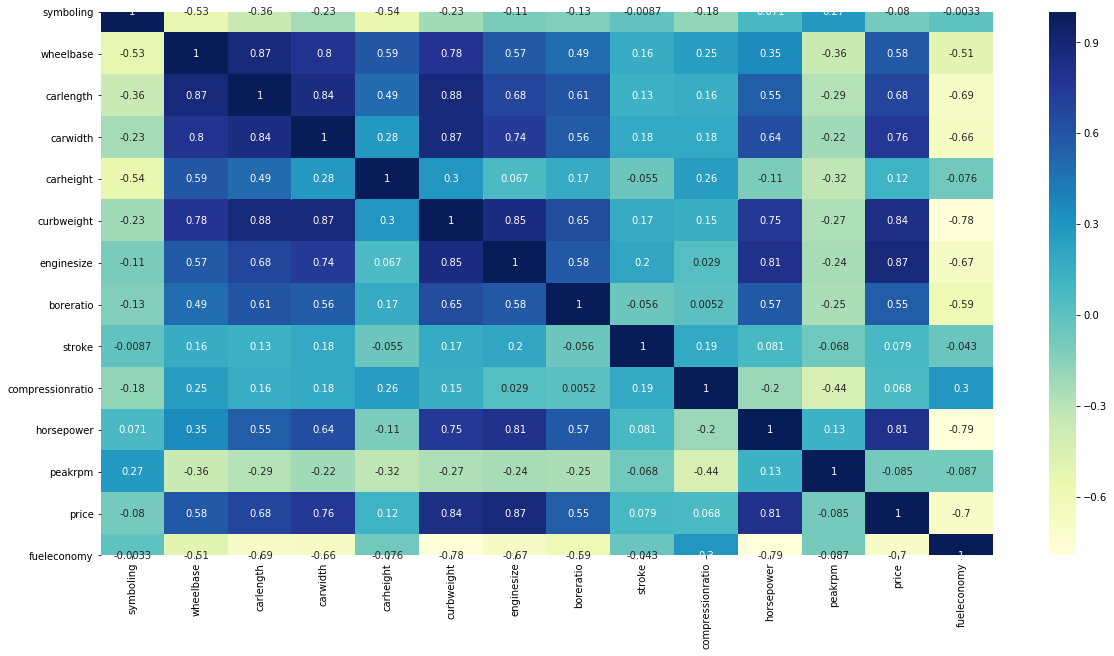

In [711]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(CarPrice.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dealing with highly corelated data after data visualisation

From above heat map as we can notice there is a high corelation between:<br/> 1.carlength, curbweight, wheelbase and carwidth, so we can drop 3 out of 4, so lets drop carwidth and carlength and wheelbase <br/> 2.There is a high corelation of .81 between horsepower and enginesize, so lets drop horsepower

In [712]:
CarPrice.drop(['carwidth','carlength','wheelbase','horsepower'], axis =1, inplace = True)
CarPrice.head()

symboling fueltype aspiration doornumber      carbody drivewheel  \
0          3      gas        std        two  convertible        rwd   
1          3      gas        std        two  convertible        rwd   
2          1      gas        std        two    hatchback        rwd   
3          2      gas        std       four        sedan        fwd   
4          2      gas        std       four        sedan        4wd   

  enginelocation  carheight  curbweight enginetype cylindernumber  enginesize  \
0          front       48.8        2548       dohc           four         130   
1          front       48.8        2548       dohc           four         130   
2          front       52.4        2823       ohcv            six         152   
3          front       54.3        2337        ohc           four         109   
4          front       54.3        2824        ohc           five         136   

  fuelsystem  boreratio  stroke  compressionratio  peakrpm  price carsrange  \
0       mpfi       3.47    2.68               9.0     5000  13495    Medium   
1       mpfi       3.47    2.68               9.0     5000  16500    Medium   
2       mpfi       2.68    3.47               9.0     5000  16500    Medium   
3       mpfi       3.19    3.40              10.0     5500  13950    Medium   
4       mpfi       3.19    3.40               8.0     5500  17450    Medium   

   fueleconomy  
0        23.70  
1        23.70  
2        22.15  
3        26.70  
4        19.80

## Dummy Variables

- We can see that our dataset has many columns with categorical values.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s.

In [713]:

# Creating Dummy Variables:
#1. Car Company -'alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
#       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
#       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
#      'subaru', 'toyota', 'volkswagen', 'volvo'

# this is grouped into three buckets based on price -high,medium,low, Here we create dummies for this. 

#  If both medium and highend is 0, it means it is low priced car.

carcompany = pd.get_dummies(CarPrice['carsrange'], drop_first = True)

# Add the results to the original housing dataframe

CarPrice = pd.concat([CarPrice, carcompany], axis = 1)

# After dummies creation, we delete the carsrange column
CarPrice=CarPrice.drop(['carsrange'], axis = 1)

CarPrice.head()

symboling fueltype aspiration doornumber      carbody drivewheel  \
0          3      gas        std        two  convertible        rwd   
1          3      gas        std        two  convertible        rwd   
2          1      gas        std        two    hatchback        rwd   
3          2      gas        std       four        sedan        fwd   
4          2      gas        std       four        sedan        4wd   

  enginelocation  carheight  curbweight enginetype cylindernumber  enginesize  \
0          front       48.8        2548       dohc           four         130   
1          front       48.8        2548       dohc           four         130   
2          front       52.4        2823       ohcv            six         152   
3          front       54.3        2337        ohc           four         109   
4          front       54.3        2824        ohc           five         136   

  fuelsystem  boreratio  stroke  compressionratio  peakrpm  price  \
0       mpfi       3.47    2.68               9.0     5000  13495   
1       mpfi       3.47    2.68               9.0     5000  16500   
2       mpfi       2.68    3.47               9.0     5000  16500   
3       mpfi       3.19    3.40              10.0     5500  13950   
4       mpfi       3.19    3.40               8.0     5500  17450   

   fueleconomy  Medium  Highend  
0        23.70       1        0  
1        23.70       1        0  
2        22.15       1        0  
3        26.70       1        0  
4        19.80       1        0

In [714]:
# Creating Dummy Variables:
# 2. Fuel Type -Gas or diesel
# if all the below fields are 0, it means Fuel Type is diesel
CarPrice['fueltypeisgas']=  np.where(CarPrice['fueltype'] == 'gas', 1,0)

# After dummies creation, we delete the fueltype column
CarPrice=CarPrice.drop(['fueltype'], axis = 1)

CarPrice.head()

symboling aspiration doornumber      carbody drivewheel enginelocation  \
0          3        std        two  convertible        rwd          front   
1          3        std        two  convertible        rwd          front   
2          1        std        two    hatchback        rwd          front   
3          2        std       four        sedan        fwd          front   
4          2        std       four        sedan        4wd          front   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  peakrpm  price  fueleconomy  Medium  \
0       3.47    2.68               9.0     5000  13495        23.70       1   
1       3.47    2.68               9.0     5000  16500        23.70       1   
2       2.68    3.47               9.0     5000  16500        22.15       1   
3       3.19    3.40              10.0     5500  13950        26.70       1   
4       3.19    3.40               8.0     5500  17450        19.80       1   

   Highend  fueltypeisgas  
0        0              1  
1        0              1  
2        0              1  
3        0              1  
4        0              1

In [715]:
# Creating Dummy Variables:
# 3. doornumber -2 or 4
# if all the below fields are 0, it means door number is four

CarPrice['2doors']=  np.where(CarPrice['doornumber'] == 'two', 1,0)

# After dummies creation, we delete the doornumber column
CarPrice=CarPrice.drop(['doornumber'], axis = 1)

CarPrice.head()

symboling aspiration      carbody drivewheel enginelocation  carheight  \
0          3        std  convertible        rwd          front       48.8   
1          3        std  convertible        rwd          front       48.8   
2          1        std    hatchback        rwd          front       52.4   
3          2        std        sedan        fwd          front       54.3   
4          2        std        sedan        4wd          front       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  peakrpm  price  fueleconomy  Medium  Highend  \
0    2.68               9.0     5000  13495        23.70       1        0   
1    2.68               9.0     5000  16500        23.70       1        0   
2    3.47               9.0     5000  16500        22.15       1        0   
3    3.40              10.0     5500  13950        26.70       1        0   
4    3.40               8.0     5500  17450        19.80       1        0   

   fueltypeisgas  2doors  
0              1       1  
1              1       1  
2              1       1  
3              1       0  
4              1       0

In [716]:
# Creating Dummy Variables:
# 4. aspiration -std or turbo
# if all the below fields are 0, it means aspiration is turbo

CarPrice['aspirationisstd']=  np.where(CarPrice['aspiration'] == 'std', 1,0)


# After dummies creation, we delete the aspiration column
CarPrice=CarPrice.drop(['aspiration'], axis = 1)

CarPrice.head()

symboling      carbody drivewheel enginelocation  carheight  curbweight  \
0          3  convertible        rwd          front       48.8        2548   
1          3  convertible        rwd          front       48.8        2548   
2          1    hatchback        rwd          front       52.4        2823   
3          2        sedan        fwd          front       54.3        2337   
4          2        sedan        4wd          front       54.3        2824   

  enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0       dohc           four         130       mpfi       3.47    2.68   
1       dohc           four         130       mpfi       3.47    2.68   
2       ohcv            six         152       mpfi       2.68    3.47   
3        ohc           four         109       mpfi       3.19    3.40   
4        ohc           five         136       mpfi       3.19    3.40   

   compressionratio  peakrpm  price  fueleconomy  Medium  Highend  \
0               9.0     5000  13495        23.70       1        0   
1               9.0     5000  16500        23.70       1        0   
2               9.0     5000  16500        22.15       1        0   
3              10.0     5500  13950        26.70       1        0   
4               8.0     5500  17450        19.80       1        0   

   fueltypeisgas  2doors  aspirationisstd  
0              1       1                1  
1              1       1                1  
2              1       1                1  
3              1       0                1  
4              1       0                1

In [718]:

#Correcting the spelling errors 

print(CarPrice.drivewheel.unique())

#There are 2 values which are having different spelling with same meaning. 
#So we are replacing it with a single value to aid easy understanding.

CarPrice = CarPrice.replace({'drivewheel' : { '4wd' : 'fwd'}})

print(CarPrice.drivewheel.unique())

['rwd' 'fwd']
['rwd' 'fwd']


In [719]:
# Creating Dummy Variables:
# 5. drivewheel fwd or rwd
# if all the below fields are 0, it means drivewheel is rwd


CarPrice['drivewheelisfwd']=  np.where(CarPrice['drivewheel'] == 'fwd', 1,0)

#After dummies creation, we delete drivewheel column
CarPrice=CarPrice.drop(['drivewheel'], axis = 1)

CarPrice.head()

symboling      carbody enginelocation  carheight  curbweight enginetype  \
0          3  convertible          front       48.8        2548       dohc   
1          3  convertible          front       48.8        2548       dohc   
2          1    hatchback          front       52.4        2823       ohcv   
3          2        sedan          front       54.3        2337        ohc   
4          2        sedan          front       54.3        2824        ohc   

  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  \
0           four         130       mpfi       3.47    2.68               9.0   
1           four         130       mpfi       3.47    2.68               9.0   
2            six         152       mpfi       2.68    3.47               9.0   
3           four         109       mpfi       3.19    3.40              10.0   
4           five         136       mpfi       3.19    3.40               8.0   

   peakrpm  price  fueleconomy  Medium  Highend  fueltypeisgas  2doors  \
0     5000  13495        23.70       1        0              1       1   
1     5000  16500        23.70       1        0              1       1   
2     5000  16500        22.15       1        0              1       1   
3     5500  13950        26.70       1        0              1       0   
4     5500  17450        19.80       1        0              1       0   

   aspirationisstd  drivewheelisfwd  
0                1                0  
1                1                0  
2                1                0  
3                1                1  
4                1                1

In [720]:
# Creating Dummy Variables:
# 6. Engine Location -Front or Rear
# if all the below fields are 0, it means engine location is rear

CarPrice['enginelocationisfront']=  np.where(CarPrice['enginelocation'] == 'front', 1,0)

#After dummies creation, we delete enginelocation column
CarPrice=CarPrice.drop(['enginelocation'], axis = 1)

CarPrice.head()

symboling      carbody  carheight  curbweight enginetype cylindernumber  \
0          3  convertible       48.8        2548       dohc           four   
1          3  convertible       48.8        2548       dohc           four   
2          1    hatchback       52.4        2823       ohcv            six   
3          2        sedan       54.3        2337        ohc           four   
4          2        sedan       54.3        2824        ohc           five   

   enginesize fuelsystem  boreratio  stroke  compressionratio  peakrpm  price  \
0         130       mpfi       3.47    2.68               9.0     5000  13495   
1         130       mpfi       3.47    2.68               9.0     5000  16500   
2         152       mpfi       2.68    3.47               9.0     5000  16500   
3         109       mpfi       3.19    3.40              10.0     5500  13950   
4         136       mpfi       3.19    3.40               8.0     5500  17450   

   fueleconomy  Medium  Highend  fueltypeisgas  2doors  aspirationisstd  \
0        23.70       1        0              1       1                1   
1        23.70       1        0              1       1                1   
2        22.15       1        0              1       1                1   
3        26.70       1        0              1       0                1   
4        19.80       1        0              1       0                1   

   drivewheelisfwd  enginelocationisfront  
0                0                      1  
1                0                      1  
2                0                      1  
3                1                      1  
4                1                      1

In [721]:
# Creating Dummy Variables:
# cylinder number is 2,3,4,5,6,8,12
# if all the below fields are 0, it means cylinder number is 8

# Let's drop the first column from cylindernumber df using 'drop_first = True

cylindernumber = pd.get_dummies(CarPrice['cylindernumber'], drop_first = True)

# Add the results to the original CarPrice dataframe

CarPrice = pd.concat([CarPrice, cylindernumber], axis = 1)


#AFter dummies creation, we delete the cylinder number column
CarPrice=CarPrice.drop(['cylindernumber'], axis = 1)

CarPrice.head()

symboling      carbody  carheight  curbweight enginetype  enginesize  \
0          3  convertible       48.8        2548       dohc         130   
1          3  convertible       48.8        2548       dohc         130   
2          1    hatchback       52.4        2823       ohcv         152   
3          2        sedan       54.3        2337        ohc         109   
4          2        sedan       54.3        2824        ohc         136   

  fuelsystem  boreratio  stroke  compressionratio  peakrpm  price  \
0       mpfi       3.47    2.68               9.0     5000  13495   
1       mpfi       3.47    2.68               9.0     5000  16500   
2       mpfi       2.68    3.47               9.0     5000  16500   
3       mpfi       3.19    3.40              10.0     5500  13950   
4       mpfi       3.19    3.40               8.0     5500  17450   

   fueleconomy  Medium  Highend  fueltypeisgas  2doors  aspirationisstd  \
0        23.70       1        0              1       1                1   
1        23.70       1        0              1       1                1   
2        22.15       1        0              1       1                1   
3        26.70       1        0              1       0                1   
4        19.80       1        0              1       0                1   

   drivewheelisfwd  enginelocationisfront  five  four  six  three  twelve  two  
0                0                      1     0     1    0      0       0    0  
1                0                      1     0     1    0      0       0    0  
2                0                      1     0     0    1      0       0    0  
3                1                      1     0     1    0      0       0    0  
4                1                      1     1     0    0      0       0    0

In [722]:
# Creating Dummy Variables:
# 8. fuel system is mpfi,mfi,spdi,spfi,1bbl,2bbl,4bbl,idi
# if all the below fields are 0, it means fuel system is 1bbl
# Let's drop the first column from fuelsystem df using 'drop_first = True

fuelsystem = pd.get_dummies(CarPrice['fuelsystem'], drop_first = True)

# Add the results to the original CarPrice dataframe

CarPrice = pd.concat([CarPrice, fuelsystem], axis = 1)


#AFter dummies creation, we delete the fuelsystem column
CarPrice=CarPrice.drop(['fuelsystem'], axis = 1)

CarPrice.head()

symboling      carbody  carheight  curbweight enginetype  enginesize  \
0          3  convertible       48.8        2548       dohc         130   
1          3  convertible       48.8        2548       dohc         130   
2          1    hatchback       52.4        2823       ohcv         152   
3          2        sedan       54.3        2337        ohc         109   
4          2        sedan       54.3        2824        ohc         136   

   boreratio  stroke  compressionratio  peakrpm  price  fueleconomy  Medium  \
0       3.47    2.68               9.0     5000  13495        23.70       1   
1       3.47    2.68               9.0     5000  16500        23.70       1   
2       2.68    3.47               9.0     5000  16500        22.15       1   
3       3.19    3.40              10.0     5500  13950        26.70       1   
4       3.19    3.40               8.0     5500  17450        19.80       1   

   Highend  fueltypeisgas  2doors  aspirationisstd  drivewheelisfwd  \
0        0              1       1                1                0   
1        0              1       1                1                0   
2        0              1       1                1                0   
3        0              1       0                1                1   
4        0              1       0                1                1   

   enginelocationisfront  five  four  six  three  twelve  two  2bbl  4bbl  \
0                      1     0     1    0      0       0    0     0     0   
1                      1     0     1    0      0       0    0     0     0   
2                      1     0     0    1      0       0    0     0     0   
3                      1     0     1    0      0       0    0     0     0   
4                      1     1     0    0      0       0    0     0     0   

   idi  mfi  mpfi  spdi  spfi  
0    0    0     1     0     0  
1    0    0     1     0     0  
2    0    0     1     0     0  
3    0    0     1     0     0  
4    0    0     1     0     0

In [723]:
# Creating Dummy Variables:
# 9. Engine type is dohc,ohcv,ohc,I,ohcf,dohcv,rotor
# if all the below fields are 0, it means engine type is dohc
# Let's drop the first column from enginetype df using 'drop_first = True

enginetype = pd.get_dummies(CarPrice['enginetype'], drop_first = True)

# Add the results to the original CarPrice dataframe

CarPrice = pd.concat([CarPrice, enginetype], axis = 1)

#AFter dummies creation, we delete the enginetype column
CarPrice=CarPrice.drop(['enginetype'], axis = 1)

CarPrice.head()

symboling      carbody  carheight  curbweight  enginesize  boreratio  \
0          3  convertible       48.8        2548         130       3.47   
1          3  convertible       48.8        2548         130       3.47   
2          1    hatchback       52.4        2823         152       2.68   
3          2        sedan       54.3        2337         109       3.19   
4          2        sedan       54.3        2824         136       3.19   

   stroke  compressionratio  peakrpm  price  fueleconomy  Medium  Highend  \
0    2.68               9.0     5000  13495        23.70       1        0   
1    2.68               9.0     5000  16500        23.70       1        0   
2    3.47               9.0     5000  16500        22.15       1        0   
3    3.40              10.0     5500  13950        26.70       1        0   
4    3.40               8.0     5500  17450        19.80       1        0   

   fueltypeisgas  2doors  aspirationisstd  drivewheelisfwd  \
0              1       1                1                0   
1              1       1                1                0   
2              1       1                1                0   
3              1       0                1                1   
4              1       0                1                1   

   enginelocationisfront  five  four  six  three  twelve  two  2bbl  4bbl  \
0                      1     0     1    0      0       0    0     0     0   
1                      1     0     1    0      0       0    0     0     0   
2                      1     0     0    1      0       0    0     0     0   
3                      1     0     1    0      0       0    0     0     0   
4                      1     1     0    0      0       0    0     0     0   

   idi  mfi  mpfi  spdi  spfi  dohcv  l  ohc  ohcf  ohcv  rotor  
0    0    0     1     0     0      0  0    0     0     0      0  
1    0    0     1     0     0      0  0    0     0     0      0  
2    0    0     1     0     0      0  0    0     0     1      0  
3    0    0     1     0     0      0  0    1     0     0      0  
4    0    0     1     0     0      0  0    1     0     0      0

In [724]:
# Creating Dummy Variables:
# 10. Car body - convertible,hatchback,sedan,wagon,hardtop
# if all of the below columns are zero, then  it means the car body is hardtop

CarPrice['carbodyisconvertible']=  np.where(CarPrice['carbody'] == 'convertible', 1,0)
CarPrice['carbodyishatchback']=  np.where(CarPrice['carbody'] == 'hatchback', 1,0)
CarPrice['carbodyissedan']=  np.where(CarPrice['carbody'] == 'sedan', 1,0)
CarPrice['carbodyiswagon']=  np.where(CarPrice['carbody'] == 'wagon', 1,0)


#AFter dummies creation, we delete the carbody column
CarPrice=CarPrice.drop(['carbody'], axis = 1)

CarPrice.head()

symboling  carheight  curbweight  enginesize  boreratio  stroke  \
0          3       48.8        2548         130       3.47    2.68   
1          3       48.8        2548         130       3.47    2.68   
2          1       52.4        2823         152       2.68    3.47   
3          2       54.3        2337         109       3.19    3.40   
4          2       54.3        2824         136       3.19    3.40   

   compressionratio  peakrpm  price  fueleconomy  Medium  Highend  \
0               9.0     5000  13495        23.70       1        0   
1               9.0     5000  16500        23.70       1        0   
2               9.0     5000  16500        22.15       1        0   
3              10.0     5500  13950        26.70       1        0   
4               8.0     5500  17450        19.80       1        0   

   fueltypeisgas  2doors  aspirationisstd  drivewheelisfwd  \
0              1       1                1                0   
1              1       1                1                0   
2              1       1                1                0   
3              1       0                1                1   
4              1       0                1                1   

   enginelocationisfront  five  four  six  three  twelve  two  2bbl  4bbl  \
0                      1     0     1    0      0       0    0     0     0   
1                      1     0     1    0      0       0    0     0     0   
2                      1     0     0    1      0       0    0     0     0   
3                      1     0     1    0      0       0    0     0     0   
4                      1     1     0    0      0       0    0     0     0   

   idi  mfi  mpfi  spdi  spfi  dohcv  l  ohc  ohcf  ohcv  rotor  \
0    0    0     1     0     0      0  0    0     0     0      0   
1    0    0     1     0     0      0  0    0     0     0      0   
2    0    0     1     0     0      0  0    0     0     1      0   
3    0    0     1     0     0      0  0    1     0     0      0   
4    0    0     1     0     0      0  0    1     0     0      0   

   carbodyisconvertible  carbodyishatchback  carbodyissedan  carbodyiswagon  
0                     1                   0               0               0  
1                     1                   0               0               0  
2                     0                   1               0               0  
3                     0                   0               1               0  
4                     0                   0               1               0

In [725]:
# Creating Dummy Variables:
# 11. Symboling -2,-1,0,1,2,3
# if all of the below columns are zero, then  it means the symboling is 3

CarPrice['symbolingisRisky']=  np.where(CarPrice['symboling'] > 0, 1,0)
CarPrice['symbolingisNotRisky']=  np.where(CarPrice['symboling'] <= 0, 1,0)

#AFter dummies creation, we delete the carbody column
CarPrice=CarPrice.drop(['symboling'], axis = 1)

CarPrice.head()

carheight  curbweight  enginesize  boreratio  stroke  compressionratio  \
0       48.8        2548         130       3.47    2.68               9.0   
1       48.8        2548         130       3.47    2.68               9.0   
2       52.4        2823         152       2.68    3.47               9.0   
3       54.3        2337         109       3.19    3.40              10.0   
4       54.3        2824         136       3.19    3.40               8.0   

   peakrpm  price  fueleconomy  Medium  Highend  fueltypeisgas  2doors  \
0     5000  13495        23.70       1        0              1       1   
1     5000  16500        23.70       1        0              1       1   
2     5000  16500        22.15       1        0              1       1   
3     5500  13950        26.70       1        0              1       0   
4     5500  17450        19.80       1        0              1       0   

   aspirationisstd  drivewheelisfwd  enginelocationisfront  five  four  six  \
0                1                0                      1     0     1    0   
1                1                0                      1     0     1    0   
2                1                0                      1     0     0    1   
3                1                1                      1     0     1    0   
4                1                1                      1     1     0    0   

   three  twelve  two  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  dohcv  l  ohc  \
0      0       0    0     0     0    0    0     1     0     0      0  0    0   
1      0       0    0     0     0    0    0     1     0     0      0  0    0   
2      0       0    0     0     0    0    0     1     0     0      0  0    0   
3      0       0    0     0     0    0    0     1     0     0      0  0    1   
4      0       0    0     0     0    0    0     1     0     0      0  0    1   

   ohcf  ohcv  rotor  carbodyisconvertible  carbodyishatchback  \
0     0     0      0                     1                   0   
1     0     0      0                     1                   0   
2     0     1      0                     0                   1   
3     0     0      0                     0                   0   
4     0     0      0                     0                   0   

   carbodyissedan  carbodyiswagon  symbolingisRisky  symbolingisNotRisky  
0               0               0                 1                    0  
1               0               0                 1                    0  
2               0               0                 1                    0  
3               1               0                 1                    0  
4               1               0                 1                    0

In [630]:
CarPrice.shape

(205, 41)

In [631]:
CarPrice.head()

carheight  curbweight  enginesize  boreratio  stroke  compressionratio  \
0       48.8        2548         130       3.47    2.68               9.0   
1       48.8        2548         130       3.47    2.68               9.0   
2       52.4        2823         152       2.68    3.47               9.0   
3       54.3        2337         109       3.19    3.40              10.0   
4       54.3        2824         136       3.19    3.40               8.0   

   peakrpm  price  fueleconomy  Medium  Highend  fueltypeisgas  2doors  \
0     5000  13495        23.70       1        0              1       1   
1     5000  16500        23.70       1        0              1       1   
2     5000  16500        22.15       1        0              1       1   
3     5500  13950        26.70       1        0              1       0   
4     5500  17450        19.80       1        0              1       0   

   aspirationisstd  drivewheelisfwd  enginelocationisfront  five  four  six  \
0                1                0                      1     0     1    0   
1                1                0                      1     0     1    0   
2                1                0                      1     0     0    1   
3                1                1                      1     0     1    0   
4                1                1                      1     1     0    0   

   three  twelve  two  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  dohcv  l  ohc  \
0      0       0    0     0     0    0    0     1     0     0      0  0    0   
1      0       0    0     0     0    0    0     1     0     0      0  0    0   
2      0       0    0     0     0    0    0     1     0     0      0  0    0   
3      0       0    0     0     0    0    0     1     0     0      0  0    1   
4      0       0    0     0     0    0    0     1     0     0      0  0    1   

   ohcf  ohcv  rotor  carbodyisconvertible  carbodyishatchback  \
0     0     0      0                     1                   0   
1     0     0      0                     1                   0   
2     0     1      0                     0                   1   
3     0     0      0                     0                   0   
4     0     0      0                     0                   0   

   carbodyissedan  carbodyiswagon  symbolingisRisky  symbolingisNotRisky  
0               0               0                 1                    0  
1               0               0                 1                    0  
2               0               0                 1                    0  
3               1               0                 1                    0  
4               1               0                 1                    0

## Step 4: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [726]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(CarPrice, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the features using MinMax Scaling



In [572]:
from sklearn.preprocessing import MinMaxScaler

In [727]:
scaler = MinMaxScaler()

In [728]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = [ 'curbweight', 'carheight','enginesize','boreratio','stroke','compressionratio',
           'peakrpm','fueleconomy','price']


df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [729]:
df_train.describe()

carheight  curbweight  enginesize   boreratio      stroke  \
count  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.509004    0.407878    0.241351    0.497946    0.535389   
std      0.215378    0.211269    0.154619    0.207140    0.157843   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.353982    0.245539    0.135849    0.305556    0.464646   
50%      0.522124    0.355702    0.184906    0.500000    0.545455   
75%      0.668142    0.559542    0.301887    0.682540    0.611111   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       compressionratio     peakrpm       price  fueleconomy      Medium  \
count        143.000000  143.000000  143.000000   143.000000  143.000000   
mean           0.190787    0.400029    0.219309     0.358265    0.412587   
std            0.237181    0.196438    0.215682     0.185980    0.494030   
min            0.000000    0.000000    0.000000     0.000000    0.000000   
25%            0.100000    0.265306    0.067298     0.198903    0.000000   
50%            0.125000    0.428571    0.140343     0.344307    0.000000   
75%            0.150000    0.551020    0.313479     0.512346    1.000000   
max            1.000000    1.000000    1.000000     1.000000    1.000000   

          Highend  fueltypeisgas      2doors  aspirationisstd  \
count  143.000000     143.000000  143.000000       143.000000   
mean     0.118881       0.909091    0.440559         0.818182   
std      0.324786       0.288490    0.498199         0.387050   
min      0.000000       0.000000    0.000000         0.000000   
25%      0.000000       1.000000    0.000000         1.000000   
50%      0.000000       1.000000    0.000000         1.000000   
75%      0.000000       1.000000    1.000000         1.000000   
max      1.000000       1.000000    1.000000         1.000000   

       drivewheelisfwd  enginelocationisfront        five        four  \
count       143.000000             143.000000  143.000000  143.000000   
mean          0.650350               0.993007    0.062937    0.741259   
std           0.478536               0.083624    0.243703    0.439483   
min           0.000000               0.000000    0.000000    0.000000   
25%           0.000000               1.000000    0.000000    0.000000   
50%           1.000000               1.000000    0.000000    1.000000   
75%           1.000000               1.000000    0.000000    1.000000   
max           1.000000               1.000000    1.000000    1.000000   

              six       three      twelve         two        2bbl        4bbl  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.132867    0.006993    0.006993    0.027972    0.349650    0.020979   
std      0.340624    0.083624    0.083624    0.165472    0.478536    0.143818   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              idi    mfi        mpfi        spdi   spfi       dohcv  \
count  143.000000  143.0  143.000000  143.000000  143.0  143.000000   
mean     0.090909    0.0    0.440559    0.041958    0.0    0.006993   
std      0.288490    0.0    0.498199    0.201198    0.0    0.083624   
min      0.000000    0.0    0.000000    0.000000    0.0    0.000000   
25%      0.000000    0.0    0.000000    0.000000    0.0    0.000000   
50%      0.000000    0.0    0.000000    0.000000    0.0    0.000000   
75%      0.000000    0.0    1.000000    0.000000    0.0    0.000000   
max      1.000000    0.0    1.000000    1.000000    0.0    1.000000   

                l         ohc        ohcf        ohcv       rotor  \
count  143.000000 

### Dividing into X and Y sets for the model building

In [731]:
y_train = df_train.pop('price')
X_train = df_train

In [733]:
print(X_train.head())


     carheight  curbweight  enginesize  boreratio    stroke  compressionratio  \
122   0.265487    0.272692    0.139623   0.230159  0.525253           0.15000   
125   0.212389    0.500388    0.339623   1.000000  0.464646           0.15625   
166   0.424779    0.314973    0.139623   0.444444  0.449495           0.15000   
1     0.088496    0.411171    0.260377   0.626984  0.247475           0.12500   
199   0.858407    0.647401    0.260377   0.746032  0.484848           0.03125   

      peakrpm  fueleconomy  Medium  Highend  fueltypeisgas  2doors  \
122  0.551020     0.530864       0        0              1       0   
125  0.551020     0.213992       0        1              1       1   
166  1.000000     0.344307       0        0              1       1   
1    0.346939     0.244170       1        0              1       1   
199  0.387755     0.122085       1        0              1       0   

     aspirationisstd  drivewheelisfwd  enginelocationisfront  five  four  six  \
122        

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [734]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [735]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [736]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('carheight', False, 14),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 11),
 ('peakrpm', True, 1),
 ('fueleconomy', False, 3),
 ('Medium', False, 5),
 ('Highend', True, 1),
 ('fueltypeisgas', False, 10),
 ('2doors', False, 18),
 ('aspirationisstd', True, 1),
 ('drivewheelisfwd', False, 17),
 ('enginelocationisfront', True, 1),
 ('five', False, 7),
 ('four', False, 9),
 ('six', False, 8),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('2bbl', False, 15),
 ('4bbl', False, 6),
 ('idi', False, 13),
 ('mfi', False, 25),
 ('mpfi', False, 21),
 ('spdi', True, 1),
 ('spfi', False, 26),
 ('dohcv', False, 16),
 ('l', False, 22),
 ('ohc', True, 1),
 ('ohcf', False, 4),
 ('ohcv', True, 1),
 ('rotor', True, 1),
 ('carbodyisconvertible', False, 2),
 ('carbodyishatchback', False, 20),
 ('carbodyissedan', False, 19),
 ('carbodyiswagon', False, 12),
 ('symbolingisRisky', False, 23),
 ('symbolingisNotRis

In [737]:
col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'enginesize', 'boreratio', 'stroke', 'peakrpm', 'Highend',
       'aspirationisstd', 'enginelocationisfront', 'three', 'twelve', 'two',
       'spdi', 'ohc', 'ohcv', 'rotor'],
      dtype='object')

In [738]:
X_train.columns[~rfe.support_]

Index(['carheight', 'compressionratio', 'fueleconomy', 'Medium',
       'fueltypeisgas', '2doors', 'drivewheelisfwd', 'five', 'four', 'six',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spfi', 'dohcv', 'l', 'ohcf',
       'carbodyisconvertible', 'carbodyishatchback', 'carbodyissedan',
       'carbodyiswagon', 'symbolingisRisky', 'symbolingisNotRisky'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

# Model 1:

In [739]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [740]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [741]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [742]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     142.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.83e-71
Time:                        20:41:36   Log-Likelihood:                 217.92
No. Observations:                 143   AIC:                            -405.8
Df Residuals:                     128   BIC:                            -361.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [743]:
X_train_new = X_train_rfe

In [744]:
X_train_new.columns

Index(['const', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'peakrpm',
       'Highend', 'aspirationisstd', 'enginelocationisfront', 'three',
       'twelve', 'two', 'spdi', 'ohc', 'ohcv', 'rotor'],
      dtype='object')

In [745]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [746]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
10                    two    inf
14                  rotor    inf
1              enginesize  75.63
7   enginelocationisfront  51.97
0              curbweight  42.81
3                  stroke  38.57
2               boreratio  16.56
6         aspirationisstd  10.78
12                    ohc   9.63
4                 peakrpm   5.95
5                 Highend   3.79
13                   ohcv   2.42
9                  twelve   2.08
11                   spdi   1.52
8                   three   1.19

`two`,`rotor` seem to have very high VIF i.e., infinity, so we ll first drop two first.

In [747]:
X_train_new = X_train_new.drop(["two"], axis = 1)
print(X_train_new.columns)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Index(['curbweight', 'enginesize', 'boreratio', 'stroke', 'peakrpm', 'Highend',
       'aspirationisstd', 'enginelocationisfront', 'three', 'twelve', 'spdi',
       'ohc', 'ohcv', 'rotor'],
      dtype='object')


Features    VIF
1              enginesize  75.63
7   enginelocationisfront  51.97
0              curbweight  42.81
3                  stroke  38.57
2               boreratio  16.56
6         aspirationisstd  10.78
11                    ohc   9.63
4                 peakrpm   5.95
5                 Highend   3.79
12                   ohcv   2.42
13                  rotor   2.40
9                  twelve   2.08
10                   spdi   1.52
8                   three   1.19

Rebuilding the model without `two`<br/>
# Model 2:

In [748]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     142.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.83e-71
Time:                        20:42:07   Log-Likelihood:                 217.92
No. Observations:                 143   AIC:                            -405.8
Df Residuals:                     128   BIC:                            -361.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

Now lets drop the next highest VIF variable- `enginesize`

In [749]:
X_train_new = X_train_new.drop(["enginesize"], axis = 1)
print(X_train_new.columns)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Index(['curbweight', 'boreratio', 'stroke', 'peakrpm', 'Highend',
       'aspirationisstd', 'enginelocationisfront', 'three', 'twelve', 'spdi',
       'ohc', 'ohcv', 'rotor'],
      dtype='object')


Features    VIF
6   enginelocationisfront  42.93
2                  stroke  22.43
0              curbweight  21.16
1               boreratio  14.21
5         aspirationisstd   8.69
10                    ohc   8.37
3                 peakrpm   5.95
4                 Highend   2.18
11                   ohcv   1.70
9                    spdi   1.46
12                  rotor   1.34
8                  twelve   1.22
7                   three   1.16

Rebuilding the model without `enginesize`

# Model 3:

In [750]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     103.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.82e-61
Time:                        20:42:27   Log-Likelihood:                 190.86
No. Observations:                 143   AIC:                            -353.7
Df Residuals:                     129   BIC:                            -312.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

Suddenly the p value of twelve is high. So we decide to drop the twelve from the list.

In [751]:
X_train_new = X_train_new.drop(["twelve"], axis = 1)
print(X_train_new.columns)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Index(['curbweight', 'boreratio', 'stroke', 'peakrpm', 'Highend',
       'aspirationisstd', 'enginelocationisfront', 'three', 'spdi', 'ohc',
       'ohcv', 'rotor'],
      dtype='object')


Features    VIF
6   enginelocationisfront  42.86
2                  stroke  21.46
0              curbweight  20.77
1               boreratio  14.11
5         aspirationisstd   8.66
9                     ohc   8.30
3                 peakrpm   5.95
4                 Highend   2.16
10                   ohcv   1.62
8                    spdi   1.46
11                  rotor   1.34
7                   three   1.16

Rebuilding the model without twelve

# Model 4:

In [752]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     112.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.67e-62
Time:                        20:42:45   Log-Likelihood:                 190.86
No. Observations:                 143   AIC:                            -355.7
Df Residuals:                     130   BIC:                            -317.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

Next we ll drop the next highest P value : boreratio
    
# Model 5:

In [753]:
X_train_new = X_train_new.drop(["boreratio"], axis = 1)
X_train_new.columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5   enginelocationisfront  34.99
1                  stroke  20.52
0              curbweight  16.08
4         aspirationisstd   8.48
8                     ohc   7.88
2                 peakrpm   5.93
3                 Highend   2.14
7                    spdi   1.43
9                    ohcv   1.41
10                  rotor   1.34
6                   three   1.15

In [754]:
  # Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     123.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.47e-63
Time:                        20:42:56   Log-Likelihood:                 190.86
No. Observations:                 143   AIC:                            -357.7
Df Residuals:                     131   BIC:                            -322.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

The next highest pvalue is stroke. So we drop that.

# Model 6:

In [755]:
X_train_new = X_train_new.drop(["stroke"], axis = 1)
print(X_train_new.columns)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Index(['curbweight', 'peakrpm', 'Highend', 'aspirationisstd',
       'enginelocationisfront', 'three', 'spdi', 'ohc', 'ohcv', 'rotor'],
      dtype='object')


Features    VIF
4  enginelocationisfront  33.84
0             curbweight  12.43
3        aspirationisstd   8.45
1                peakrpm   5.91
7                    ohc   5.51
2                Highend   2.08
8                   ohcv   1.41
6                   spdi   1.39
9                  rotor   1.29
5                  three   1.12

In [756]:
  # Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     136.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.87e-64
Time:                        20:43:10   Log-Likelihood:                 190.40
No. Observations:                 143   AIC:                            -358.8
Df Residuals:                     132   BIC:                            -326.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

The next highest P value of variable is three. 

# Model 7:

In [757]:
X_train_new = X_train_new.drop(["three"], axis = 1)
print(X_train_new.columns)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Index(['curbweight', 'peakrpm', 'Highend', 'aspirationisstd',
       'enginelocationisfront', 'spdi', 'ohc', 'ohcv', 'rotor'],
      dtype='object')


Features    VIF
4  enginelocationisfront  31.47
0             curbweight  11.53
3        aspirationisstd   8.42
1                peakrpm   5.91
6                    ohc   5.15
2                Highend   2.02
7                   ohcv   1.41
5                   spdi   1.39
8                  rotor   1.28

In [758]:
  # Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     149.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.11e-65
Time:                        20:43:19   Log-Likelihood:                 189.05
No. Observations:                 143   AIC:                            -358.1
Df Residuals:                     133   BIC:                            -328.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

Now the  variable with next highest p value is rotor. So removing that.

# Model 8:

In [759]:
X_train_new = X_train_new.drop(["rotor"], axis = 1)
print(X_train_new.columns)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Index(['curbweight', 'peakrpm', 'Highend', 'aspirationisstd',
       'enginelocationisfront', 'spdi', 'ohc', 'ohcv'],
      dtype='object')


Features    VIF
4  enginelocationisfront  31.36
0             curbweight  11.49
3        aspirationisstd   8.42
1                peakrpm   5.34
6                    ohc   4.61
2                Highend   2.02
5                   spdi   1.39
7                   ohcv   1.38

In [760]:
  # Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     167.2
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.78e-66
Time:                        20:43:30   Log-Likelihood:                 188.28
No. Observations:                 143   AIC:                            -358.6
Df Residuals:                     134   BIC:                            -331.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

Now the  variable with next highest p value is ohc. So removing that.

# Model 9:

In [761]:
X_train_new = X_train_new.drop(["ohc"], axis = 1)
print(X_train_new.columns)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Index(['curbweight', 'peakrpm', 'Highend', 'aspirationisstd',
       'enginelocationisfront', 'spdi', 'ohcv'],
      dtype='object')


Features    VIF
4  enginelocationisfront  22.37
0             curbweight   9.82
3        aspirationisstd   8.40
1                peakrpm   5.34
2                Highend   1.88
5                   spdi   1.37
6                   ohcv   1.28

In [762]:
  # Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.95e-67
Time:                        20:43:43   Log-Likelihood:                 187.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     135   BIC:                            -336.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

Now the  variable with next highest p value is ohcv. So removing that.

# Model 10:

In [763]:
X_train_new = X_train_new.drop(["ohcv"], axis = 1)
print(X_train_new.columns)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Index(['curbweight', 'peakrpm', 'Highend', 'aspirationisstd',
       'enginelocationisfront', 'spdi'],
      dtype='object')


Features    VIF
4  enginelocationisfront  20.88
0             curbweight   8.46
3        aspirationisstd   8.15
1                peakrpm   5.33
2                Highend   1.86
5                   spdi   1.37

In [764]:
  # Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     220.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.51e-67
Time:                        20:43:55   Log-Likelihood:                 186.72
No. Observations:                 143   AIC:                            -359.4
Df Residuals:                     136   BIC:                            -338.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

Now the  variable with next highest p value is aspirationisstd. So removing that.

# Model 11:

In [765]:
X_train_new = X_train_new.drop(["aspirationisstd"], axis = 1)
print(X_train_new.columns)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Index(['curbweight', 'peakrpm', 'Highend', 'enginelocationisfront', 'spdi'], dtype='object')


Features    VIF
3  enginelocationisfront  11.36
0             curbweight   7.26
1                peakrpm   5.08
2                Highend   1.72
4                   spdi   1.06

In [766]:
  # Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     262.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.57e-68
Time:                        20:44:08   Log-Likelihood:                 185.59
No. Observations:                 143   AIC:                            -359.2
Df Residuals:                     137   BIC:                            -341.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.10

Now the  variable with next highest p value is spdi. So removing that.

# Model 12:

In [767]:
X_train_new = X_train_new.drop(["spdi"], axis = 1)
print(X_train_new.columns)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Index(['curbweight', 'peakrpm', 'Highend', 'enginelocationisfront'], dtype='object')


Features    VIF
3  enginelocationisfront  11.36
0             curbweight   7.25
1                peakrpm   5.04
2                Highend   1.71

In [768]:
  # Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     326.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.66e-69
Time:                        20:44:19   Log-Likelihood:                 184.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     138   BIC:                            -344.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.10

Now the  variable with next highest p value is `enginelocationisfront`. So removing that.

# Model 13:

In [769]:
X_train_new = X_train_new.drop(["enginelocationisfront"], axis = 1)
print(X_train_new.columns)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Index(['curbweight', 'peakrpm', 'Highend'], dtype='object')


Features   VIF
0  curbweight  3.28
1     peakrpm  2.44
2     Highend  1.56

In [770]:
  # Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     402.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.74e-68
Time:                        20:44:28   Log-Likelihood:                 179.25
No. Observations:                 143   AIC:                            -350.5
Df Residuals:                     139   BIC:                            -338.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1397      0.021     -6.696      0.0

## Inference :
<br/>
- R-squared and Adjusted R-squared (extent of fit) - 0.897 and 0.894 - 90% variance explained.<br/>
- F-stats and Prob(F-stats) (overall model fit) 402.1 and 2.74e-68(approx. 0.0)<br/>
- This means that Model fit is significant and explained 90% variance is just not by chance.<br/>
- p-values - p-values for all the coefficients seem to be zero. - meaning that all the predictors are statistically significant.<br/>

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

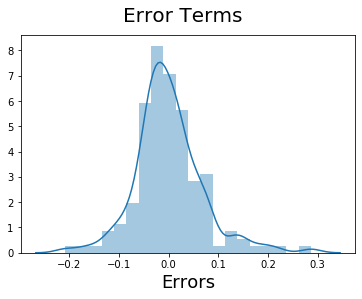

In [771]:
y_train_price = lm.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final.

#### Applying the scaling on the test sets


In [772]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [773]:
df_test.describe()

carheight  curbweight  enginesize  boreratio     stroke  \
count  62.000000   62.000000   62.000000  62.000000  62.000000   
mean    0.454249    0.371743    0.228835   0.667691   0.654504   
std     0.234487    0.222354    0.188416   0.228484   0.173913   
min     0.000000    0.000000    0.000000   0.000000   0.000000   
25%     0.264423    0.219125    0.126638   0.515873   0.590164   
50%     0.485577    0.344065    0.183406   0.674603   0.699454   
75%     0.605769    0.540726    0.287118   0.857143   0.759563   
max     1.000000    1.000000    1.000000   1.000000   1.000000   

       compressionratio    peakrpm      price  fueleconomy     Medium  \
count         62.000000  62.000000  62.000000    62.000000  62.000000   
mean           0.209375   0.393351   0.209644     0.459039   0.435484   
std            0.273690   0.192092   0.210911     0.234994   0.499868   
min            0.000000   0.000000   0.000000     0.000000   0.000000   
25%            0.093750   0.265306   0.076536     0.254604   0.000000   
50%            0.125000   0.346939   0.136847     0.434622   0.000000   
75%            0.150000   0.540816   0.280049     0.602210   1.000000   
max            1.000000   1.000000   1.000000     1.000000   1.000000   

         Highend  fueltypeisgas     2doors  aspirationisstd  drivewheelisfwd  \
count  62.000000      62.000000  62.000000        62.000000        62.000000   
mean    0.112903       0.887097   0.435484         0.822581         0.580645   
std     0.319058       0.319058   0.499868         0.385142         0.497482   
min     0.000000       0.000000   0.000000         0.000000         0.000000   
25%     0.000000       1.000000   0.000000         1.000000         0.000000   
50%     0.000000       1.000000   0.000000         1.000000         1.000000   
75%     0.000000       1.000000   1.000000         1.000000         1.000000   
max     1.000000       1.000000   1.000000         1.000000         1.000000   

       enginelocationisfront       five       four        six  three  twelve  \
count              62.000000  62.000000  62.000000  62.000000   62.0    62.0   
mean                0.967742   0.032258   0.854839   0.080645    0.0     0.0   
std                 0.178127   0.178127   0.355139   0.274512    0.0     0.0   
min                 0.000000   0.000000   0.000000   0.000000    0.0     0.0   
25%                 1.000000   0.000000   1.000000   0.000000    0.0     0.0   
50%                 1.000000   0.000000   1.000000   0.000000    0.0     0.0   
75%                 1.000000   0.000000   1.000000   0.000000    0.0     0.0   
max                 1.000000   1.000000   1.000000   1.000000    0.0     0.0   

        two       2bbl  4bbl        idi        mfi       mpfi       spdi  \
count  62.0  62.000000  62.0  62.000000  62.000000  62.000000  62.000000   
mean    0.0   0.258065   0.0   0.112903   0.016129   0.500000   0.048387   
std     0.0   0.441142   0.0   0.319058   0.127000   0.504082   0.216335   
min     0.0   0.000000   0.0   0.000000   0.000000   0.000000   0.000000   
25%     0.0   0.000000   0.0   0.000000   0.000000   0.000000   0.000000   
50%     0.0   0.000000   0.0   0.000000   0.000000   0.500000   0.000000   
75%     0.0   0.750000   0.0   0.000000   0.000000   1.000000   0.000000   
max     0.0   1.000000   0.0   1.000000   1.000000   1.000000   1.000000   

            spfi  dohcv          l        ohc       ohcf       ohcv  rotor  \
count  62.000000   62.0  62.000000  62.000000  62.000000  62.000000   62.0   
mean    0.016129    0.0   0.048387   0.806452   0.048387   0.064516    0.0   
std     0.127000    0.0   0.216335   0.398304   0.216335   0.247676    0.0   
min     0.000000    0.0   0.000000   0.000000   0.000000   0.000000    0.0   
25%     0.000000    0.0   0.000000   1.000000   0.000000   0.000000    0.0   
50%     0.000000    0.0   0.000000   1.000000   0.000000   0.000000    0.0   
75%     0.000000    0.0   0.000000   1.000000   0.000000   0.000000    0.0   
max

#### Dividing into X_test and y_test

In [774]:
y_test = df_test.pop('price')
X_test = df_test

In [775]:
# Adding constant variable to test dataframe
X_test_final = sm.add_constant(X_test)

In [776]:
X_train_new.columns

Index(['curbweight', 'peakrpm', 'Highend'], dtype='object')

In [777]:
# Creating X_test_final dataframe by dropping variables from X_test_final

X_test_final1=X_test_final[['const','curbweight', 'peakrpm', 'Highend']]



In [778]:
X_test_final1.columns

Index(['const', 'curbweight', 'peakrpm', 'Highend'], dtype='object')

In [779]:
X_train_lm.columns

Index(['const', 'curbweight', 'peakrpm', 'Highend'], dtype='object')

In [780]:
# Making predictions using the final model

y_pred_final = lm.predict(X_test_final1)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [781]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_final)

0.8731021205052493

The R squared for train dataset is 0.883 and the test dataset is 0.873

In [782]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_final)))

RMSE : 0.07452390359802598


Text(0, 0.5, 'y_pred')

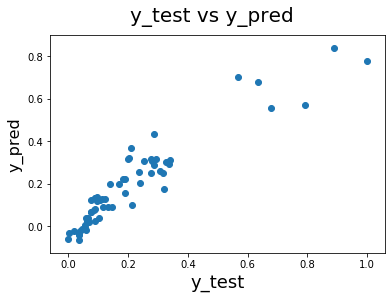

In [783]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_final)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


We can see that the equation of our best fitted line is:

$ price = -0.1397  \times  const + 0.6569  \times  curbweight + 0.1385 \times peakrpm + 0.3003 \times Highend  $


Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Add new features 
2. Build a non-linear model

# Conclusion

- The R square and Adjusted R square value in this model is almost same which is `89.8%` and `89.4%` respectively which indicates that none of the parameters in this model are redundant.

- The RSME value is `0.07452390359802598` which is reasonable less.

- As we can see that the model seems to be stable, The variables that can affect price are: <br/>

1.  curbweight
2.  peakrpm
3.  highend


<br/>Thus the above three variables significantly predicts the price of a car with approximately 90% determination.<br/>

It is recommended to produce cars with `high curbweight, high peak rpm and high end price range` to have a good start in the US market.


